# Installation

In [169]:
!pip install networkx
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
!apt install fonts-thai-tlwg

--2021-06-15 13:59:46--  https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
Resolving awards.opdc.go.th (awards.opdc.go.th)... 164.115.76.22
Connecting to awards.opdc.go.th (awards.opdc.go.th)|164.115.76.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18055 (18K) [text/html]
Saving to: ‘THSarabunNew.ttf.4’

THSarabunNew.ttf.4  100%[===================>]  17.63K  --.-KB/s    in 0s      

2021-06-15 13:59:50 (177 MB/s) - ‘THSarabunNew.ttf.4’ saved [18055/18055]

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.6.4-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [204]:
import numpy as np
import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn  as sns
import numpy as np
from sklearn.metrics import jaccard_score

from scipy.spatial.distance import cosine
from matplotlib.pyplot import figure, text
import networkx as nx

# Set font
font_list = fm.createFontList(['THSarabunChula-Regular.ttf'])
print(font_list)
fm.fontManager.ttflist.extend(font_list)
# fm.fontManager.addfont(font_list)
plt.rcParams['font.family'] = 'TH Sarabun Chula'
plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0

[<Font 'TH Sarabun Chula' (THSarabunChula-Regular.ttf) normal normal regular normal>]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  app.launch_new_instance()


In [205]:
# Find font path
print(matplotlib.matplotlib_fname())
# Find font cache path
print(matplotlib.get_cachedir())

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc
/root/.cache/matplotlib


# Read Excel

In [172]:
url = 'https://raw.githubusercontent.com/PaoLastHope/BADS7105/0152e53a89d82e3f896150083152d1803271fc06/HOMEWORK%2007/Customer_Preference_Survey_Edit.xlsx'
df = pd.read_excel(url)  
df.head()

,User,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,user001,2021-03-20 11:53:44.586,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,user002,2021-03-20 11:54:00.984,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,user003,2021-03-20 11:54:05.084,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,user004,2021-03-20 11:54:12.558,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,user005,2021-03-20 11:54:18.477,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


# EDA

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   User                             46 non-null     object        
 1   ประทับเวลา                       46 non-null     datetime64[ns]
 2   จักรยานเสือภูเขา                 46 non-null     object        
 3   คอลลาเจน                         46 non-null     object        
 4   Brownie อวกาศ                    46 non-null     object        
 5   แม่โขง                           46 non-null     object        
 6   Botox                            46 non-null     object        
 7   กัญชา                            46 non-null     object        
 8   กัญชง                            46 non-null     object        
 9   เครื่องวัดความดัน                46 non-null     object        
 10  หลอดไฟเปลี่ยนสีได้               46 non-null     object        


# Duplicate Column

In [174]:
df[['เครื่องย่อยเศษอาหาร','เครื่องย่อยเศษอาหาร.1']]

,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1
0,ไม่เคย,ไม่เคย
1,ไม่เคย,ไม่เคย
2,ไม่เคย,ไม่เคย
3,ไม่เคย,ไม่เคย
4,ไม่เคย,ไม่เคย
5,ไม่เคย,ไม่เคย
6,ไม่เคย,ไม่เคย
7,ไม่เคย,ไม่เคย
8,ไม่เคย,ไม่เคย
9,ไม่เคย,ไม่เคย


In [175]:
df = df.drop(['เครื่องย่อยเศษอาหาร.1'],axis=1)
df

,User,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,user001,2021-03-20 11:53:44.586,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,user002,2021-03-20 11:54:00.984,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,user003,2021-03-20 11:54:05.084,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,user004,2021-03-20 11:54:12.558,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,user005,2021-03-20 11:54:18.477,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,user006,2021-03-20 11:54:20.911,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,user007,2021-03-20 11:54:33.800,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,user008,2021-03-20 11:54:40.338,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,user009,2021-03-20 11:54:45.776,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เค

# Clean Data

In [176]:
obj = df.isnull().sum()
for key,value in obj.iteritems():
    if value >= 1:
        print(key,",",value)

หมูแดดเดียว , 1
เครื่องตรวจน้ำตาลในเลือด , 1
แพ็คเกจไทยเที่ยวไทย , 1
กระเป๋า chanel , 1
ถั่งเช่า , 1


In [177]:
df = df.replace('เคย',1)
df = df.replace('ไม่เคย',0)
df['Transaction_id'] = [i for i in range(1,(df.shape[0]+1))]
df[['หมูแดดเดียว','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']] = df[['หมูแดดเดียว','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].fillna(
     value = df[['หมูแดดเดียว','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].median())
df.tail()

,User,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Transaction_id
41,user042,2021-03-20 12:03:24.608,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,1.0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0.0,1,0,0,1.0,0,1,0,0.0,0,0.0,1,0,1,0,1,42
42,user043,2021-03-20 12:03:52.592,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1.0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,1,0,1,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,1,1,1,43
43,user044,2021-03-20 12:04:19.003,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1.0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1,44
44,user045,2021-04-05 16:13:52.286,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1,45
45,user046,2021-04-16 16:29:59.099,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1,1,1.0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,1,0,1.0,1,0,0,1.0,1,0,0,0.0,1,1.0,1,1,1,1,1,46


In [178]:
df.iloc[:,2].value_counts()

0    30
1    16
Name: จักรยานเสือภูเขา, dtype: int64

# Data Preparation

In [179]:
df_data = df.iloc[:,2:-1]
df_data

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0.0,1,0,1,0.0,0,0,0,1.0,0,0.0,1,0,1,1,1
5,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1.0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
7,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,1.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,1
8,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1.0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1.0,1,0,0,1.0,0,0,0,0.0,1,1.0,0,0,0,1,1
9,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1


# Visualization

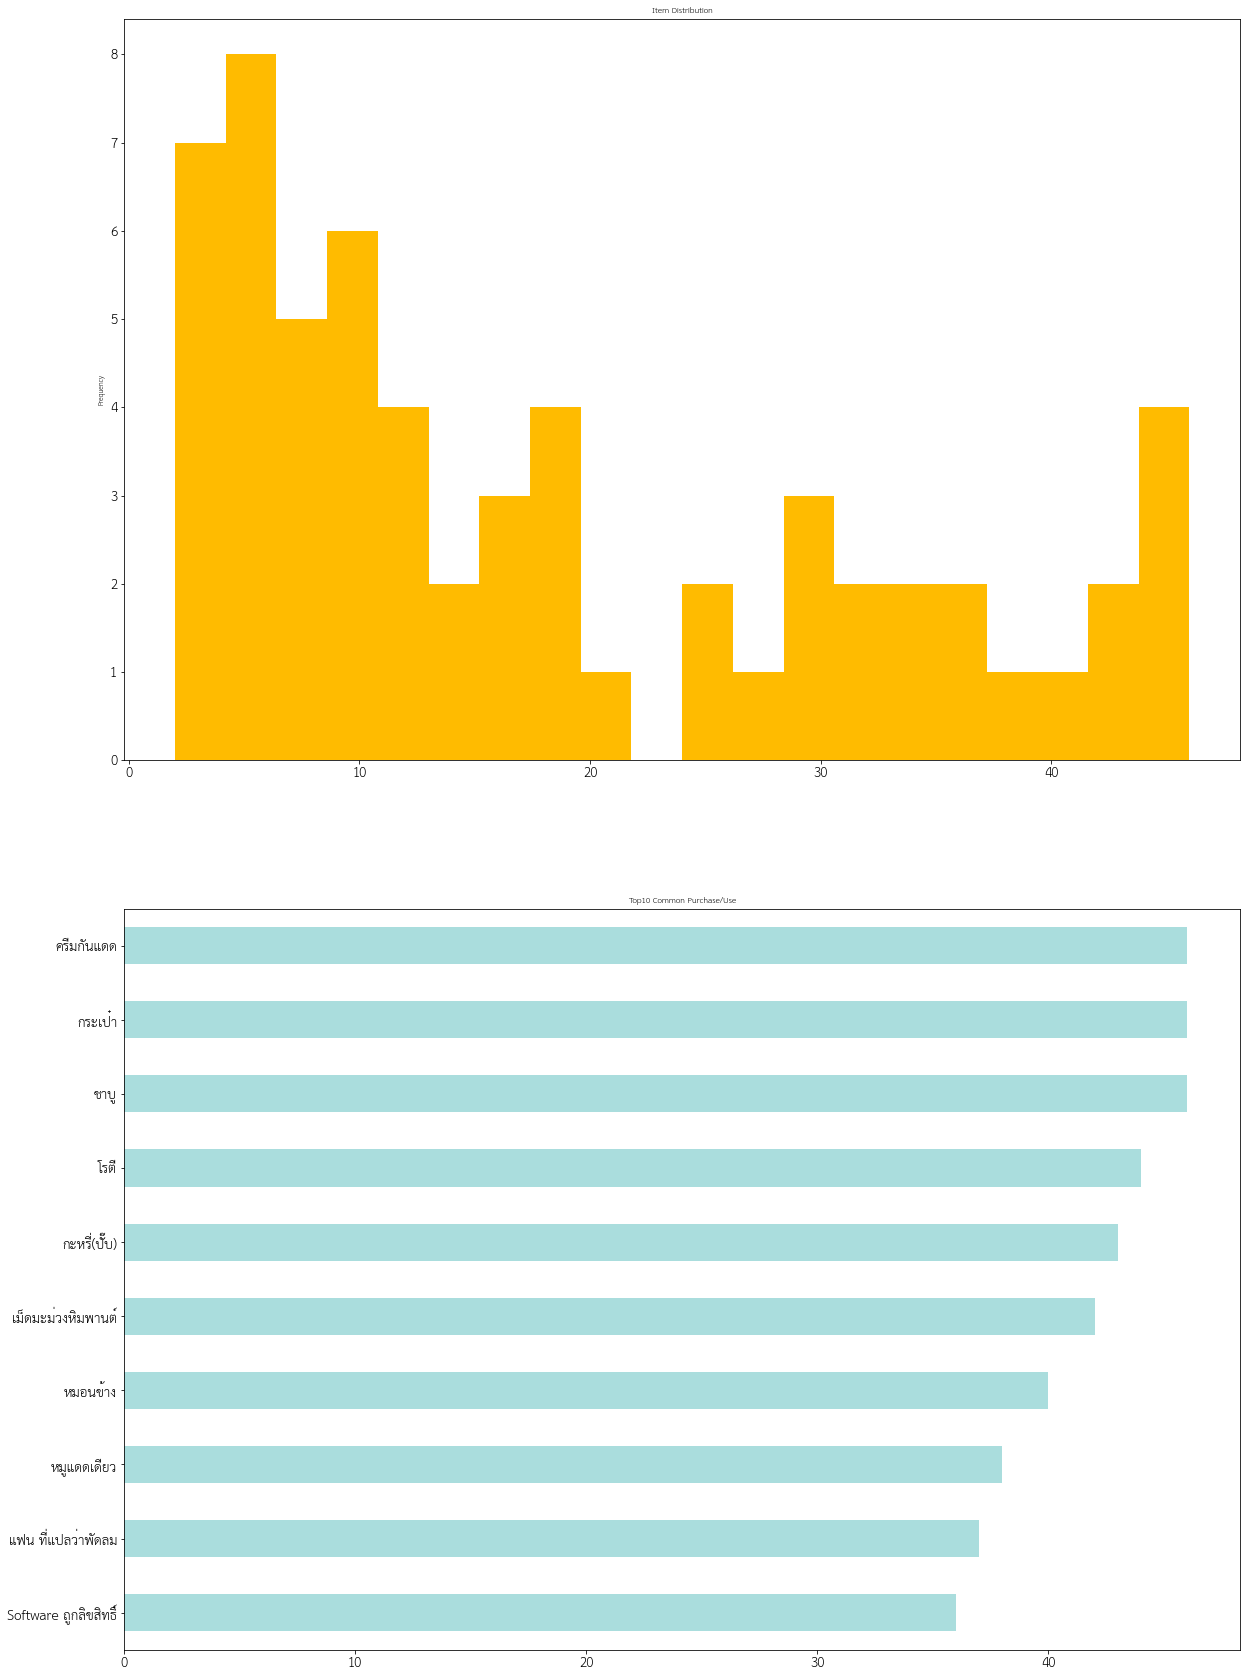

In [206]:
figure, axes = plt.subplots(2, 1,figsize=(20,30))
df_data.sum().plot.hist(bins= 20,color = '#ffbb00' ,ax=axes[0],title= 'Item Distribution')
df_data.sum().sort_values(ascending= True).tail(10).plot.barh(color = '#aadddd' ,ax=axes[1],title='Top10 Common Purchase/Use')
 
plt.show('Distribution') 

In [181]:
df.describe().T.sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Transaction_id,46.0,23.500000,13.422618,1.0,12.25,23.5,34.75,46.0
ครีมกันแดด,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
กระเป๋า,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ชาบู,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
โรตี,46.0,0.956522,0.206185,0.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,46.0,0.086957,0.284885,0.0,0.00,0.0,0.00,1.0
ห้องน้ำแมวอัตโนมัติ,46.0,0.065217,0.249637,0.0,0.00,0.0,0.00,1.0
Surfskate,46.0,0.065217,0.249637,0.0,0.00,0.0,0.00,1.0
PS5,46.0,0.043478,0.206185,0.0,0.00,0.0,0.00,1.0


In [182]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)
item_item_matrix1 = item_item_matrix.iloc[2:-1,2:-1]

# ITEM-ITEM Collaborative filtering 

In [183]:


for i in range(0,len(item_item_matrix1.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix1.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix1.iloc[i,j] =  1-cosine(df_data.iloc[:,i],df_data.iloc[:,j])

In [184]:
item_item_matrix1.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.55,0.33541,0.400892,0.416667,0.265165,0.25,0.458831,0.452267,0.125,0.102062,0.522233,0.592927,0.583717,0.223607,0.375,0.533745,0.60351,0.534297,0.216506,0.188982,0.661438,0.55,0.538816,0.446109,0.306186,0.353553,0.376889,0.301511,0.565752,0.472456,0.589768,0.589768,0.433013,0.417815,0.375,0.395285,0.540062,0.580948,0.265165,0.33541,0.416667,0.53033,0.176777,0.474342,0.603023,0.416667,0.395285,0.381881,0.102062,0.471405,0.433013,0.33541,0.306186,0.0883883,0.471405,0.375,0.456435,0.583333,0.589768
คอลลาเจน,0.55,1,0.268328,0.320713,0.533333,0.141421,0.2,0.458831,0.361814,0.4,0.163299,0.661495,0.664078,0.610658,0.447214,0.3,0.731993,0.705642,0.624716,0.404145,0.377964,0.680336,0.6,0.538816,0.616441,0.326599,0.282843,0.603023,0.482418,0.591864,0.377964,0.73721,0.73721,0.23094,0.482808,0.6,0.316228,0.709795,0.464758,0.353553,0.357771,0.333333,0.518545,0.141421,0.442719,0.753778,0.466667,0.505964,0.523723,0.244949,0.565685,0.34641,0.357771,0.244949,0.282843,0.612826,0.4,0.657267,0.7,0.73721
Brownie อวกาศ,0.33541,0.268328,1,0.478091,0.447214,0.632456,0.67082,0.102598,0.13484,0.223607,0.365148,0.389249,0.282843,0.321288,0.2,0.33541,0.340997,0.415227,0.367607,0.258199,0.169031,0.338062,0.357771,0.40161,0.290191,0.365148,0.316228,0.13484,0.26968,0.3114,0.169031,0.32969,0.32969,0.258199,0.249136,0.111803,0.424264,0.345033,0.34641,0.316228,0.2,0.596285,0.210819,0.316228,0.282843,0.3371,0.298142,0.141421,0.29277,0.365148,0.210819,0.516398,0.8,0.547723,0.158114,0.316228,0.447214,0.244949,0.372678,0.32969
แม่โขง,0.400892,0.320713,0.478091,1,0.267261,0.566947,0.400892,0.367884,0.241747,0.133631,0.436436,0.558291,0.507093,0.432014,0.119523,0.868599,0.570597,0.397033,0.52725,0.308607,0.303046,0.454569,0.427618,0.576018,0.563621,0.327327,0.188982,0.241747,0.402911,0.511766,0.202031,0.551677,0.551677,0.154303,0.397033,0.0668153,0.507093,0.57735,0.276026,0.283473,0.239046,0.445435,0.566947,0.188982,0.169031,0.564076,0.356348,0,0.349927,0.327327,0.377964,0.46291,0.358569,0.218218,0.188982,0.440959,0.267261,0.39036,0.400892,0.551677
Botox,0.416667,0.533333,0.447214,0.267261,1,0.235702,0.333333,0.229416,0.301511,0.166667,0.136083,0.348155,0.368932,0.299342,0.745356,0.25,0.406663,0.309492,0.493197,0.288675,0.377964,0.503953,0.333333,0.359211,0.324443,0.136083,0.235702,0.402015,0.402015,0.348155,0.251976,0.442326,0.442326,0.19245,0.185695,0.333333,0.316228,0.411476,0.258199,0.235702,0.298142,0.333333,0.31427,0.235702,0.421637,0.452267,0.333333,0.316228,0.363696,0.136083,0.235702,0.19245,0.596285,0.408248,0.117851,0.392837,0.166667,0.30429,0.5,0.442326
กัญชา,0.265165,0.141421,0.632456,0.566947,0.235702,1,0.53033,0.324443,0,0,0.433013,0.492366,0.391312,0.381,0,0.53033,0.431331,0.393919,0.464991,0.408248,0,0.267261,0.424264,0.4445,0.401478,0.288675,0.25,0,0.213201,0.43082,0.133631,0.417029,0.417029,0.204124,0.393919,0,0.447214,0.436436,0.365148,0.375,0.158114,0.471405,0.25,0.25,0.223607,0.426401,0.117851,0,0.231455,0.433013,0.0833333,0.408248,0.474342,0.433013,0.125,0.166667,0.353553,0.193649,0.353553,0.417029
กัญชง,0.25,0.2,0.67082,0.400892,0.333333,0.53033,1,0.114708,0.150756,0,0.408248,0.348155,0.237171,0.269408,0,0.25,0.30499

# ITEM-ITEM Heat Map

In [185]:
corr = np.round(np.array(item_item_matrix1).astype(float),decimals=2)
corr

array([[1.  , 0.55, 0.34, ..., 0.46, 0.58, 0.59],
       [0.55, 1.  , 0.27, ..., 0.66, 0.7 , 0.74],
       [0.34, 0.27, 1.  , ..., 0.24, 0.37, 0.33],
       ...,
       [0.46, 0.66, 0.24, ..., 1.  , 0.73, 0.81],
       [0.58, 0.7 , 0.37, ..., 0.73, 1.  , 0.88],
       [0.59, 0.74, 0.33, ..., 0.81, 0.88, 1.  ]])

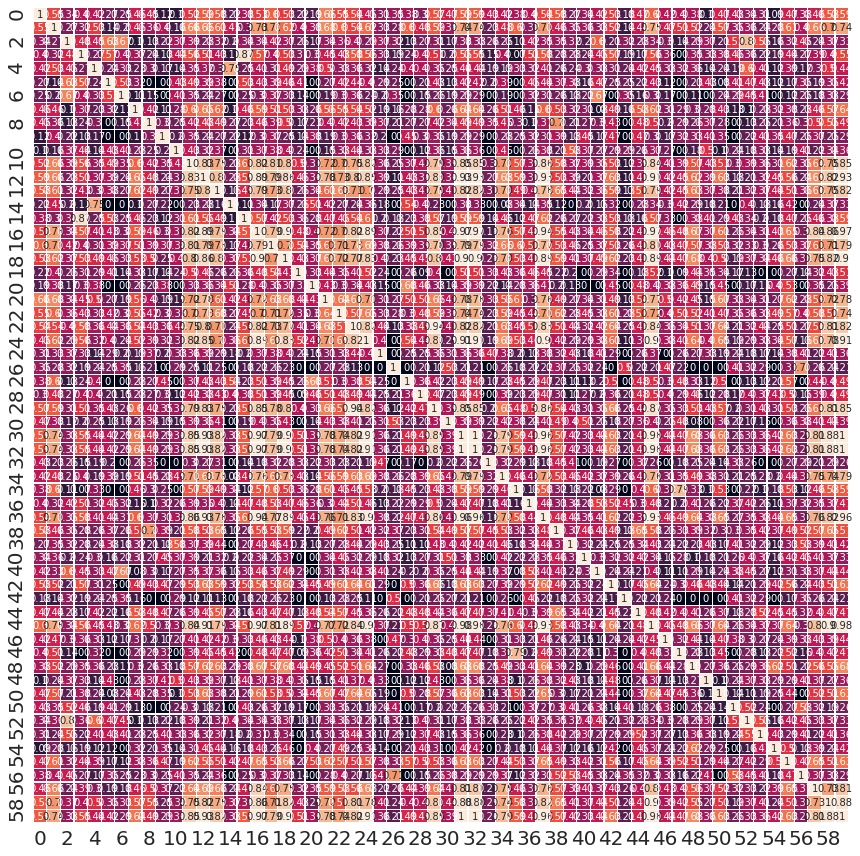

In [186]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(20,15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=0,vmax=.9, square=True, annot=True, cbar=False,  linewidths=.2)
    plt.show()

In [187]:
item_item_matrix1 = item_item_matrix1.dropna()

In [188]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [189]:
links['value'] = links.value.apply( lambda x :  round(x,3))
links.head(10)

,item,related item,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1.000
1,จักรยานเสือภูเขา,คอลลาเจน,0.550
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.335
3,จักรยานเสือภูเขา,แม่โขง,0.401
4,จักรยานเสือภูเขา,Botox,0.417
5,จักรยานเสือภูเขา,กัญชา,0.265
6,จักรยานเสือภูเขา,กัญชง,0.250
7,จักรยานเสือภูเขา,เครื่องวัดความดัน,0.459
8,จักรยานเสือภูเขา,หลอดไฟเปลี่ยนสีได้,0.452
9,จักรยานเสือภูเขา,คอร์ส bikini wax,0.125


In [190]:
links= links.loc[(links['item'] !=links['related item'])].sort_values('value',ascending = False)
links_filtered=links.loc[(links['item'] != links['related item'])& (links['value'] > 0.75)]
links_filtered.shape

(230, 3)

In [191]:
links_filtered.sort_values(by = ['value'], ascending = False).head(10)

,item,related item,value
1892,กระเป๋า,ชาบู,1.000
1919,กระเป๋า,ครีมกันแดด,1.000
1979,ชาบู,ครีมกันแดด,1.000
3571,ครีมกันแดด,กระเป๋า,1.000
1951,ชาบู,กระเป๋า,1.000
3572,ครีมกันแดด,ชาบู,1.000
2759,โรตี,ครีมกันแดด,0.978
2732,โรตี,ชาบู,0.978
1965,ชาบู,โรตี,0.978
1905,กระเป๋า,โรตี,0.978


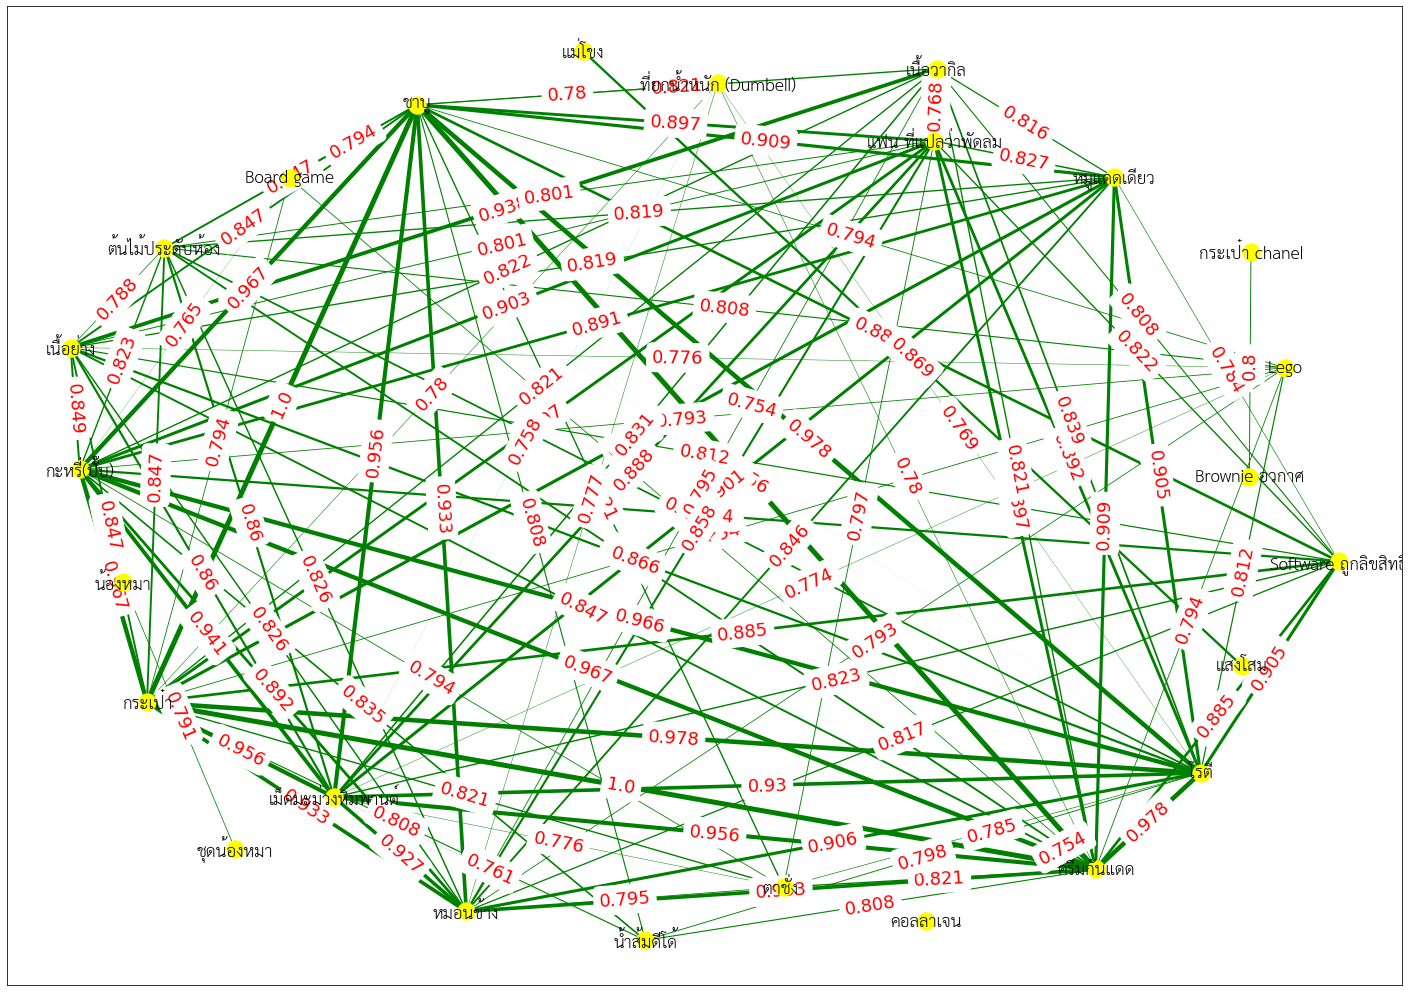

In [222]:
fig, ax = plt.subplots(figsize=(25,18))

GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])

weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}

pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = 'yellow') 
nx.draw_networkx_edges(GA, pos,edge_color='green',arrowsize=10, width=weight2, ax=ax ) 
edge_labels = nx.get_edge_attributes(GA, 'value')

nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red', font_size=18)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax, font_family='TH Sarabun Chula', font_size=25)
plt.show()

# USER-USER Collaborative filtering 

In [194]:
df_uu = df.drop(['User','ประทับเวลา','Transaction_id'],axis=1)
df_uu

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0.0,1,0,1,0.0,0,0,0,1.0,0,0.0,1,0,1,1,1
5,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1.0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
7,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,1.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,1
8,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1.0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1.0,1,0,0,1.0,0,0,0,0.0,1,1.0,0,0,0,1,1
9,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1


In [195]:
from sklearn.metrics.pairwise import cosine_similarity

In [196]:
filtering_cosim = cosine_similarity(df_uu, df_uu)
print(filtering_cosim)

[[1.         0.52981294 0.5990423  ... 0.64236405 0.63157895 0.65923172]
 [0.52981294 1.         0.60302269 ... 0.50037023 0.52981294 0.61807005]
 [0.5990423  0.60302269 1.         ... 0.59186403 0.6789146  0.70618786]
 ...
 [0.64236405 0.50037023 0.59186403 ... 1.         0.6882472  0.57470489]
 [0.63157895 0.52981294 0.6789146  ... 0.6882472  1.         0.58167505]
 [0.65923172 0.61807005 0.70618786 ... 0.57470489 0.58167505 1.        ]]


# USER-USER Heat Map

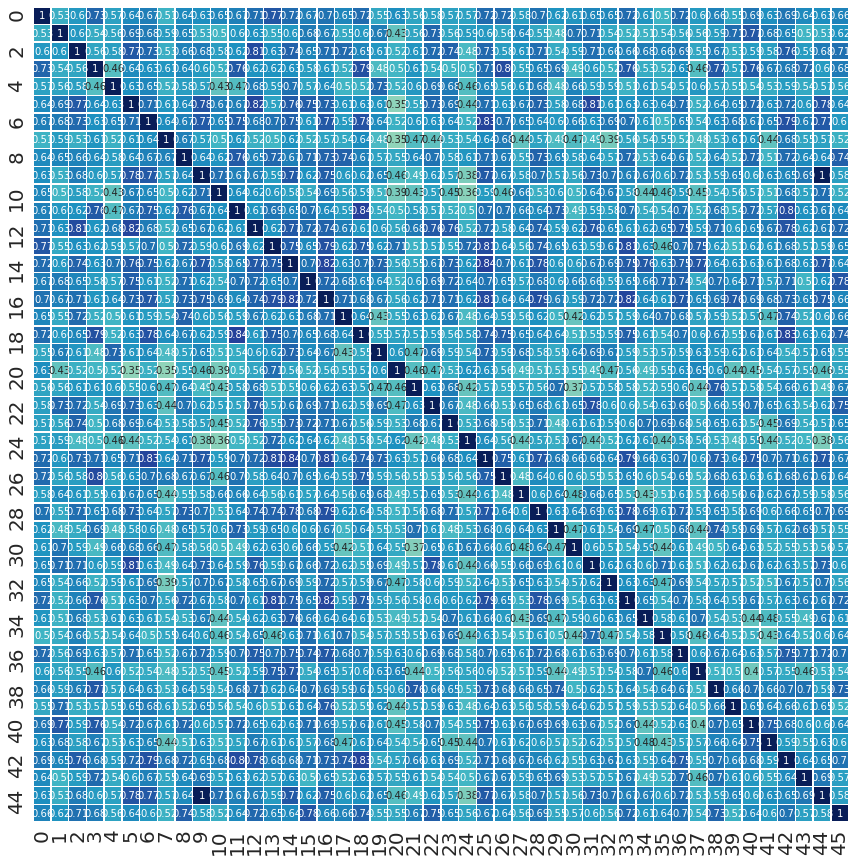

In [197]:
mask = np.zeros_like(filtering_cosim)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(20,15))
with sns.axes_style("white"):
    ax = sns.heatmap(filtering_cosim, mask=mask, vmin=0, vmax=1, square=True,  cmap="YlGnBu", annot=True, linewidths=.5, cbar=False)
    plt.show()

In [198]:
index_user = 0 # user001
most_sim_users = sorted(list(enumerate(filtering_cosim[index_user])), key=lambda x: x[1], reverse=True)
most_sim_users = most_sim_users[1:6]
sim_users = [x[0] for x in most_sim_users]
print(f'similarity user001 : {sim_users}')

similarity user001 : [13, 3, 14, 26, 33]


In [199]:
list_users = []
for u in sim_users:
    list_users.append(df.iloc[u,0])
list_users

['user014', 'user004', 'user015', 'user027', 'user034']

In [200]:
df_sim_u = df_uu.iloc[sim_users, :]
df_sim_u

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0.0,1,0,0,1.0,0,0,0,0.0,0,0.0,0,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
14,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,1.0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
26,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,1.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,1,0,1
33,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0.0,1,1,0,1.0,0,0,0,0.0,0,0.0,0,0,0,1,1


In [201]:
mean_score = pd.Series(df_sim_u.mean(axis=0))
mean_score = mean_score.sort_values(axis=0, ascending=False)
mean_score

ครีมกันแดด                         1.0
โรตี                               1.0
กะหรี่(ปั๊บ)                       1.0
แฟน ที่แปลว่าพัดลม                 1.0
หมูแดดเดียว                        1.0
กระเป๋า                            1.0
ชาบู                               1.0
Board game                         1.0
เม็ดมะม่วงหิมพานต์                 1.0
เนื้อย่าง                          1.0
Lego                               0.8
ตาชั่ง                             0.8
หมอนข้าง                           0.8
ต้นไม้ประดับห้อง                   0.8
เนื้อวากิล                         0.6
น้ำส้มดีโด้                        0.6
Software ถูกลิขสิทธิ์              0.6
เกมส์ FIFA Online                  0.4
เก้าอี้นวดไฟฟ้า                    0.4
เครื่องดูดฝุ่นอัตโนมัติ (robot)    0.4
แพ็คเกจไทยเที่ยวไทย                0.4
แสงโสม                             0.4
ยาดอง                              0.4
บัตตาเลี่ยนที่ตัดผม                0.4
กัญชา                              0.4
Omakase                  

In [202]:
recom = list(mean_score.iloc[0:10].keys())
for i in recom:
    print("แนะนำ {} ให้กับ {}".format(i,list_users))

แนะนำ ครีมกันแดด ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ โรตี ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ กะหรี่(ปั๊บ) ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ แฟน ที่แปลว่าพัดลม ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ หมูแดดเดียว ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ กระเป๋า ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ ชาบู ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ Board game ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ เม็ดมะม่วงหิมพานต์ ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
แนะนำ เนื้อย่าง ให้กับ ['user014', 'user004', 'user015', 'user027', 'user034']
